In [1]:
# Set Up project and graphic parameters
#######################################

import os
import pandas as pd
import numpy as np
import matplotlib
import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

sns.set_style(style="darkgrid")
dfs = pd.read_csv('fake_news.csv') 

import matplotlib.font_manager

#sanity tests to ensure Chinese char enabeled font is rebuilt into the Matplotlib Cache
#matplotlib.font_manager.FontManager().addfont(path='C:\\Users\\kathe\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\MicrosoftYaHei.ttf')
#[f for f in matplotlib.font_manager.fontManager.ttflist if 'MicrosoftYaHei' in f.name]
#matplotlib.font_manager.findfont('Microsoft YaHei', fontext='ttf', rebuild_if_missing = True)

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


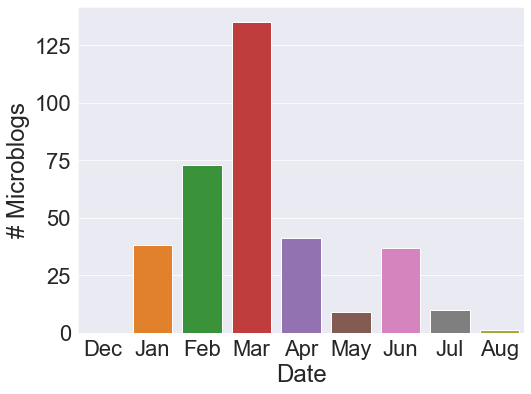

In [2]:
# Clean, read, and plot publication dates
#########################

publish_dates = dfs['date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    dates[idx] = date[:7]
    time_array = time.strptime(date, "%Y-%m-%d %H:%M")
    # print(time_array)
    nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

num = np.array(num, dtype=int)
dates = np.array(dates, dtype=str)

dates[ dates=='2019-12' ] = 'Dec'
dates[ dates=='2020-01' ] = 'Jan'
dates[ dates=='2020-02' ] = 'Feb'
dates[ dates=='2020-03' ] = 'Mar'
dates[ dates=='2020-04' ] = 'Apr'
dates[ dates=='2020-05' ] = 'May'
dates[ dates=='2020-06' ] = 'Jun'
dates[ dates=='2020-07' ] = 'Jul'
dates[ dates=='2020-08' ] = 'Aug'

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(8,6))
ax = sns.countplot(dates,order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
plt.xlabel('Date')
plt.ylabel('# Microblogs')

plt.savefig("./Date_numOfMicroblog.pdf",bbox_inches='tight')
plt.show()

In [6]:
#only install once. commenting code out to avoid repeat installations

# install the conda package for jieba per https://stackoverflow.com/questions/57887947/python-3-cannot-find-a-module
#import sys
#!conda install -c conda-forge jieba

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
meta NOT subset; don't know how to subset; dropped


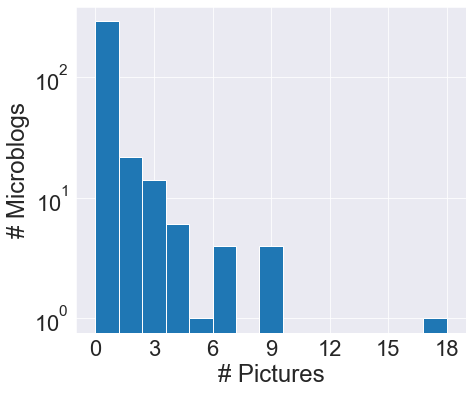

In [4]:
# Create a histogram of # of pictures
#########################################

hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
nums = np.zeros(pics.shape, dtype=int)
for idx, pic in enumerate(pics):
    if pic == "[]":
        nums[idx] = 0
    else:
        pic_url = pic[1:-1].split(',')
        nums[idx] = len(pic_url)
        
plt.figure(figsize=(7,6))
ax = sns.distplot(nums,hist=True, kde=False, bins=15, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Pictures')
plt.ylabel('# Microblogs')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([nums.min()-1,nums.max()+1])
#plt.xticks(np.arange(nums.max()+1))
plt.xticks([0,3,6,9,12,15,18])
ax.set_yscale('log')
plt.savefig("./numOfPic_numOfWb.pdf",bbox_inches='tight')
plt.show()

The avrage is 150.8575581395349
The median is 99.5


meta NOT subset; don't know how to subset; dropped


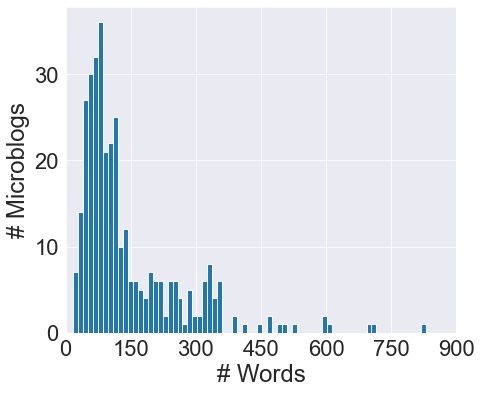

top 80% : 223
top 90% : 325
percent: 65.99%


ValueError: 150 is not in list

In [5]:
texts = dfs['text'].values
texts = np.array(texts, dtype=str)
text_nums = np.zeros(texts.shape, dtype=int)

for idx, t in enumerate(texts):
    text_nums[idx] = len(t)
    #print(text_nums[idx])

nums = text_nums
#AVRAGE
nsum=0
for i in range(len(nums)):
    nsum += nums[i]
    avrage = nsum / len(nums)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [nums[i] for i in range(len(nums))]
listnum.sort()
lnum = len(nums)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))
    
plt.figure(figsize=(7,6))
ax = sns.distplot(nums, bins=200, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Words')
plt.ylabel('# Microblogs')
plt.xlim([0, 900])
plt.xticks([0,150,300,450,600,750,900])
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfWords_numOfWb.pdf",bbox_inches='tight')
plt.show()

aaa=int(lnum*0.8)
ccc=140
ddd = 150
print('top 80% : '+ str(listnum[aaa]))

bbb=int(lnum*0.9)
print('top 90% : '+ str(listnum[bbb]))

listnum.index(ccc)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ccc)/len(listnum)))

listnum.index(ddd)/len(listnum)
print('percent: {:.2%}'.format(listnum.index(ddd)/len(listnum)))

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


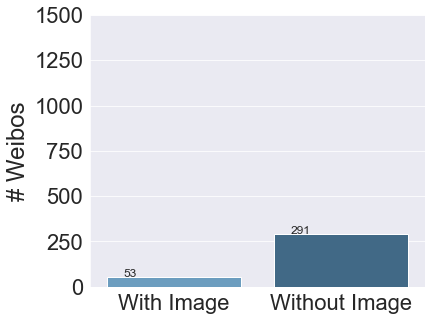

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped


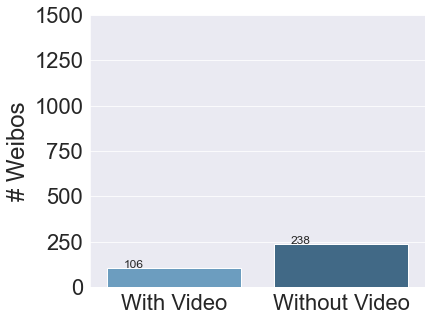

In [7]:
hist_kws = {'alpha': 1}
pics = dfs['pic_url'].values
pics = np.array(pics, dtype=str)
#print(pics)
#print(len(pics))
nopic = 0
wpic = 0
_img = []
for idx, pic in enumerate(pics):
    if pic == "[]":
        nopic = nopic+1
    else:
        wpic = wpic+1
_img = [wpic,nopic]


vis = dfs['video_url'].values
vis = np.array(vis, dtype=str)

nov = 0
wv = 0
for idx, v in enumerate(vis):
    if v == "nan":
        nov = nov+1
    else:
        wv = wv+1
_vis = [wv,nov]
plt.figure(figsize=(6,5))
x = ["With Image","Without Image"]
y = _img
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
plt.savefig("./wb&img.pdf",bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,5))
x = ["With Video","Without Video"]
y = _vis
ax = sns.barplot(x,y,palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
plt.ylabel('# Weibos')
plt.ylim([0,1500])
#ax.set_yscale('log')
plt.savefig("./wb&video.pdf",bbox_inches='tight')
plt.show()

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0 27199


meta NOT subset; don't know how to subset; dropped


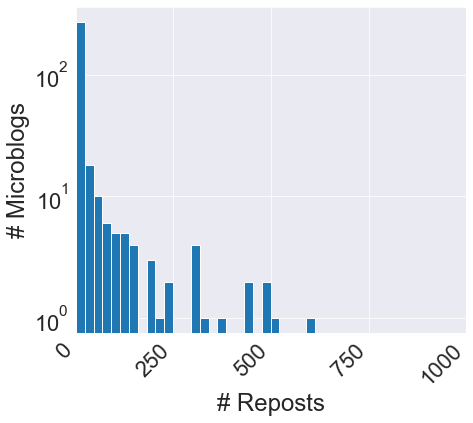

The avrage is 162.02325581395348
The median is 2.0


In [8]:
repost_num = []
hist_kws = {'alpha': 1}
for r in dfs['repost_num']:
    repost_num.append(r)

plt.figure(figsize=(7,6))
ax = sns.distplot(repost_num, bins=1200,hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
print(min(repost_num),max(repost_num))
plt.xlim([0,1000])
plt.xticks([0,250,500,750,1000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')

plt.savefig("./numOfRepost_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(repost_num)):
    nsum += repost_num[i]
    avrage = nsum / len(repost_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [repost_num[i] for i in range(len(repost_num))]
listnum.sort()
lnum = len(repost_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0 145108


meta NOT subset; don't know how to subset; dropped


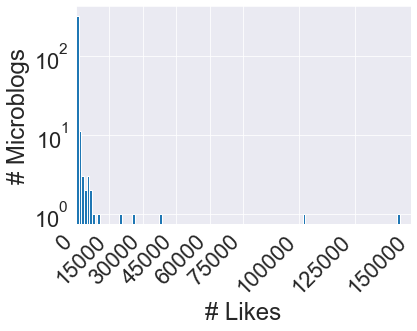

The avrage is 1293.9418604651162
The median is 16.5


In [9]:
like_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('fake_news.csv')
for l in dfs['like_num']:
    like_num.append(l)

ax = sns.distplot(like_num, bins=120, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.xlim([0, 150000])
plt.xticks([0,15000,30000,45000,60000,75000,100000,125000,150000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
print(min(like_num),max(like_num))
plt.savefig("./numOfLike_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(like_num)):
    nsum += like_num[i]
    avrage = nsum / len(like_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [like_num[i] for i in range(len(like_num))]
listnum.sort()
lnum = len(like_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\kathe\AppData\Local\Temp\jieba.cache
Loading model cost 2.393 seconds.
Prefix dict has been built successfully.


冠状病毒 33
新冠 71
疫情 177
传染 20
感染 59
确诊 49
世界卫生组织 3
世卫 1
钟南山 21
张文宏 14
李文亮 2
口罩 59
试剂盒 21
疫苗 3
抗体 1
隔离 81
封城 32
防控 17
战疫 3
抗疫 15
援鄂 5
who 4
不存在的词: ['新冠肺炎', '疫区', '死亡病例', '输入病例', '输入性传播', '福奇', '核酸检测', '火神山', '雷神山', '群体免疫', '健康码', '健康宝', 'n95', 'coronavirus', 'sars-cov-2', 'covid', 'cdc']


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


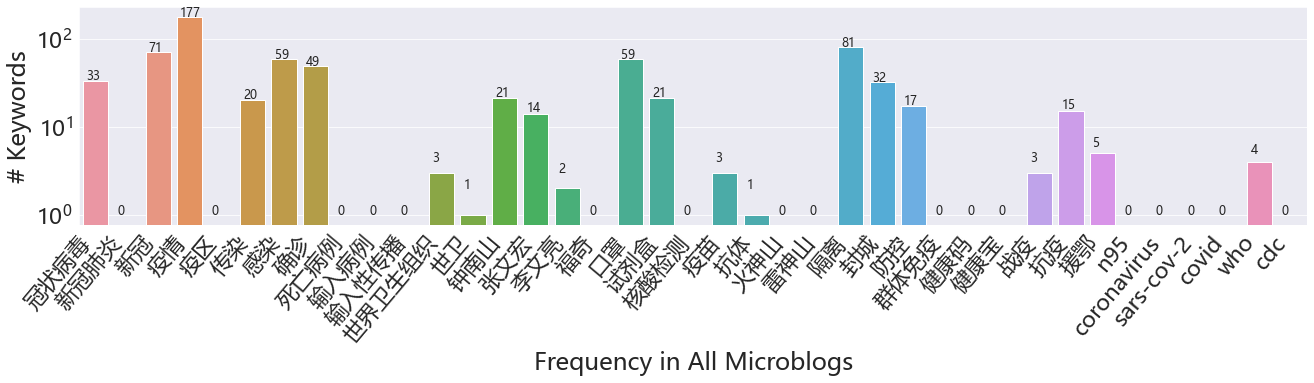

In [10]:
text = []
hist_kws = {'alpha': 1}
for l in dfs['text']:
    text.append(l)
    
data_str="\n".join(text)
file=open('keywords.txt','w+', encoding='utf-8') 
file.write(str(data_str).lower()); 
file.close()

import jieba

txt = open("keywords.txt", encoding="utf-8").read()
def jiebafenci(txt,wordslist):
    jieba.load_userdict('keywords.txt')
    words  = jieba.lcut(txt) 
    counts = {}  
    for word in words:  
        counts[word] = counts.get(word,0) + 1
    x =[]
    y =[]
    lst=[]
    for i in range(len(wordslist)):
        try:
            x.append(wordslist[i])
            y.append(counts[wordslist[i]])
            print(wordslist[i],counts[wordslist[i]])
            
        except:
            lst.append(wordslist[i])
            y.append(0)
    print('不存在的词:',lst)
    #print(x)
    #print(y)
    key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd (community) immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
    plt.figure(figsize=(22,4))
    plt.rcParams["font.family"] = 'Microsoft YaHei'
    ax = sns.barplot(key,y)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
    plt.xticks(rotation=50, horizontalalignment='right')
    matplotlib.rcParams['pdf.fonttype'] = 3
    matplotlib.rcParams['ps.fonttype'] = 3
    ax.set_yscale('log')
    plt.rc('xtick', labelsize=16)
    plt.xlabel('Frequency in All Microblogs')
    plt.ylabel('# Keywords')
    plt.savefig('./FrequencyinAllMicroblogs_numOfKeywords.pdf', bbox_inches='tight')
    
    plt.show()
    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
            
if __name__=='__main__':
    txt = open("keywords.txt", encoding="utf-8").read()
    #need_words = open("keywords.txt", encoding="utf-8").read()
    #find = []
    #for i in need_words.split():
     #   find.append(i.lower())
    jiebafenci(txt,key)

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


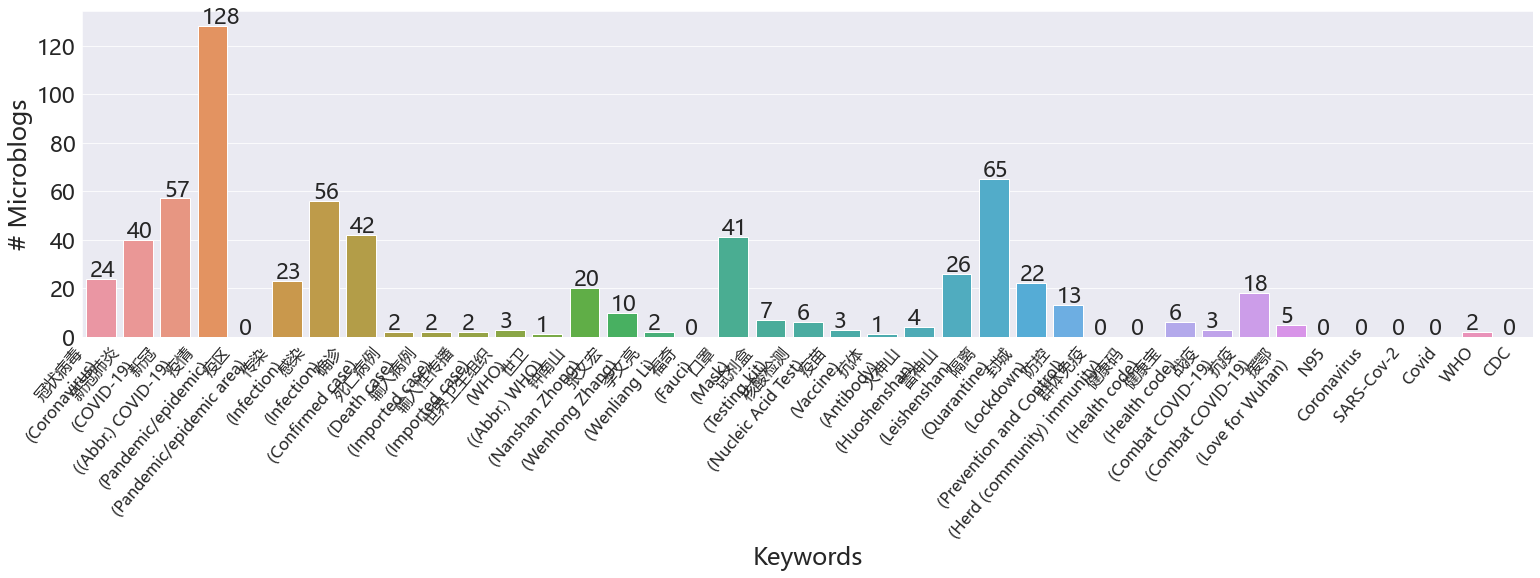

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


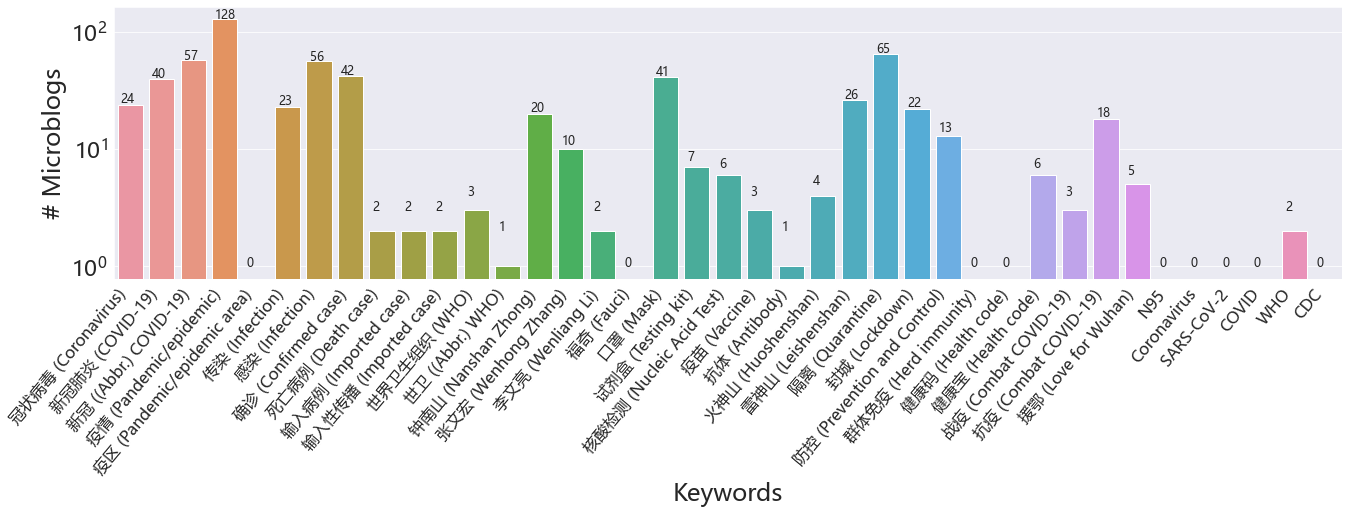

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


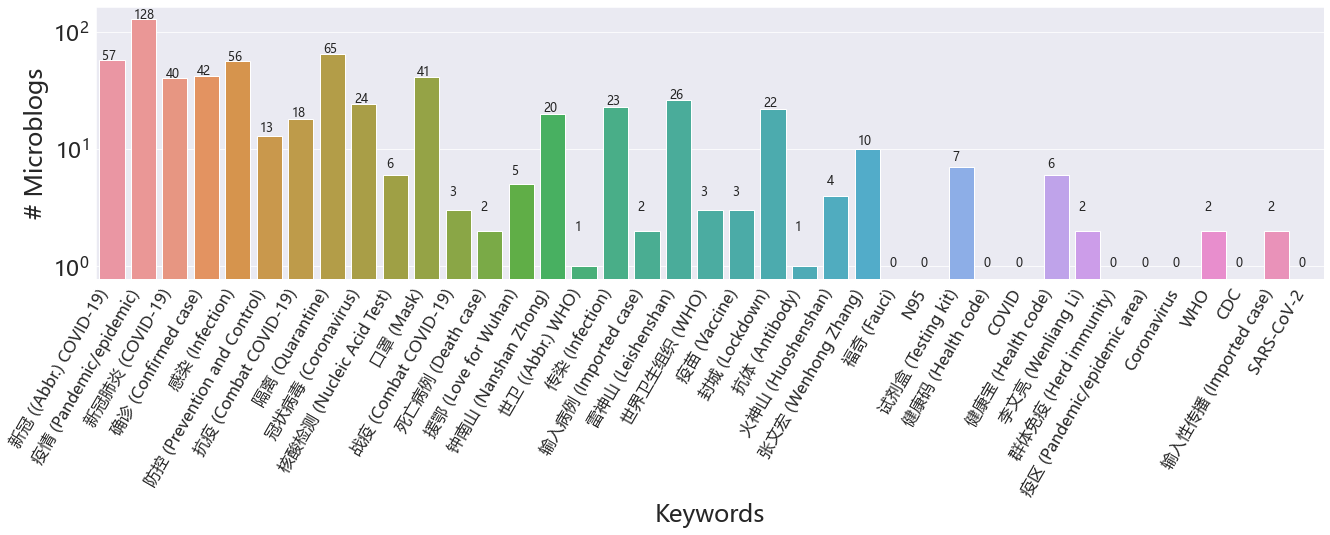

In [11]:
text = []
hist_kws = {'alpha': 1}
for l in dfs['text']:
    text.append(l.lower())

num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-CoV-2','COVID','WHO','CDC']
for t in text:
    for k in key:
        if k in t:
            index = key.index(k)
            num[index] = num[index]+1

plt.figure(figsize=(26,6))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t2,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_# Microblogs_2.pdf', bbox_inches='tight')
    
plt.show()

plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
plt.xticks(rotation=50, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
#plt.savefig('./Keywords_numOfMicroblogs.pdf', bbox_inches='tight')
plt.show()


plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num,order=['新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','新冠肺炎 (COVID-19)','确诊 (Confirmed case)','感染 (Infection)','防控 (Prevention and Control)','抗疫 (Combat COVID-19)','隔离 (Quarantine)','冠状病毒 (Coronavirus)','核酸检测 (Nucleic Acid Test)','口罩 (Mask)','战疫 (Combat COVID-19)','死亡病例 (Death case)','援鄂 (Love for Wuhan)','钟南山 (Nanshan Zhong)','世卫 ((Abbr.) WHO)','传染 (Infection)','输入病例 (Imported case)','雷神山 (Leishenshan)','世界卫生组织 (WHO)','疫苗 (Vaccine)','封城 (Lockdown)','抗体 (Antibody)','火神山 (Huoshenshan)','张文宏 (Wenhong Zhang)','福奇 (Fauci)','N95','试剂盒 (Testing kit)','健康码 (Health code)','COVID','健康宝 (Health code)','李文亮 (Wenliang Li)','群体免疫 (Herd immunity)','疫区 (Pandemic/epidemic area)','Coronavirus','WHO','CDC','输入性传播 (Imported case)','SARS-CoV-2'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.xticks(rotation=60, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
plt.savefig('./Keywords_numOfMicroblogs_3(60).pdf', bbox_inches='tight')
plt.show()

In [12]:
import jieba
import jieba.analyse
import codecs
import re
from collections import Counter


class WordCounter(object):

    def count_from_file(self, file, top_limit=0):
        with codecs.open(file, 'r', encoding='utf-8') as f:
            content = f.read()
            content = re.sub(r'\s+', r' ', content)
            content = re.sub(r'\.+', r' ', content)
            return self.count_from_str(content, top_limit=top_limit)

    def count_from_str(self, content, top_limit=0):
        if top_limit <= 0:
            top_limit = 100
        tags = jieba.analyse.extract_tags(content, topK=100)

        words = jieba.cut(content)
        counter = Counter()
        for word in words:
            if word in tags:
                counter[word] += 1

        return counter.most_common(top_limit)

if __name__ == '__main__':
    counter = WordCounter()
    result = counter.count_from_file('keywords.txt', top_limit=200)
    for k, v in result:
        print(k, v)

中国 209
美国 201
疫情 177
视频 134
微博 109
病毒 104
肺炎 93
没有 88
医疗 87
一个 82
隔离 81
医院 79
武汉 79
北京 77
新冠 71
发生 70
正常化 70
已经 66
## 65
10 60
口罩 59
感染 59
开学 57
每艘 51
确诊 49
27 47
俄罗斯 46
医生 45
所有 43
爆发 42
检测 42
地震 41
特朗普 40
全国 39
治疗 39
复工 37
回家 37
三年 37
欣佳 37
宾馆 37
这次 37
1976 36
调入 36
遇上 36
学校 35
军舰 35
女子 35
院士 34
14 33
冠状病毒 33
17 32
封城 32
入境 31
物资 31
18 30
小学 29
新型 29
加油 28
年级 28
16 28
神山 28
好运 28
开进 27
病床 27
2020 27
网页 27
链接 27
船上 26
1000 26
襄阳 26
纽约港 25
抢救 25
病例 25
25 24
口岸 24
考入 23
捐赠 23
出院 22
泉州 22
钟南山 21
非典 21
绿卡 21
试剂盒 21
15 20
23 20
12 19
20 19
唐山大 19
北川 19
病愈 19
62 19
1958 18
北川县 18
幸运地 18
2003 18
2008 18
日晚 18
享年 18
石正丽 17
职校 14


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0 7224


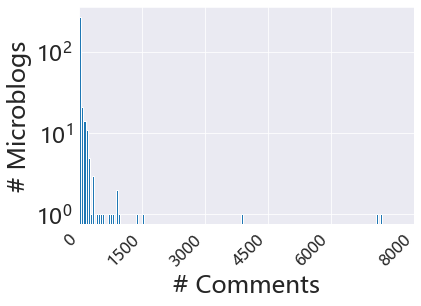

The avrage is 109.7936046511628
The median is 10.0


In [23]:
comment_num = []
hist_kws = {'alpha': 1}

for c in dfs['comment_num']:
    comment_num.append(c)

ax = sns.distplot(comment_num, bins=150, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
print(min(comment_num),max(comment_num))
plt.xlim([0,8000])
plt.xticks([0,1500,3000,4500,6000,8000],rotation=45, horizontalalignment='right')
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.savefig("./numOfComment_numOfWB.pdf",bbox_inches='tight')
plt.show()

#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))

C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


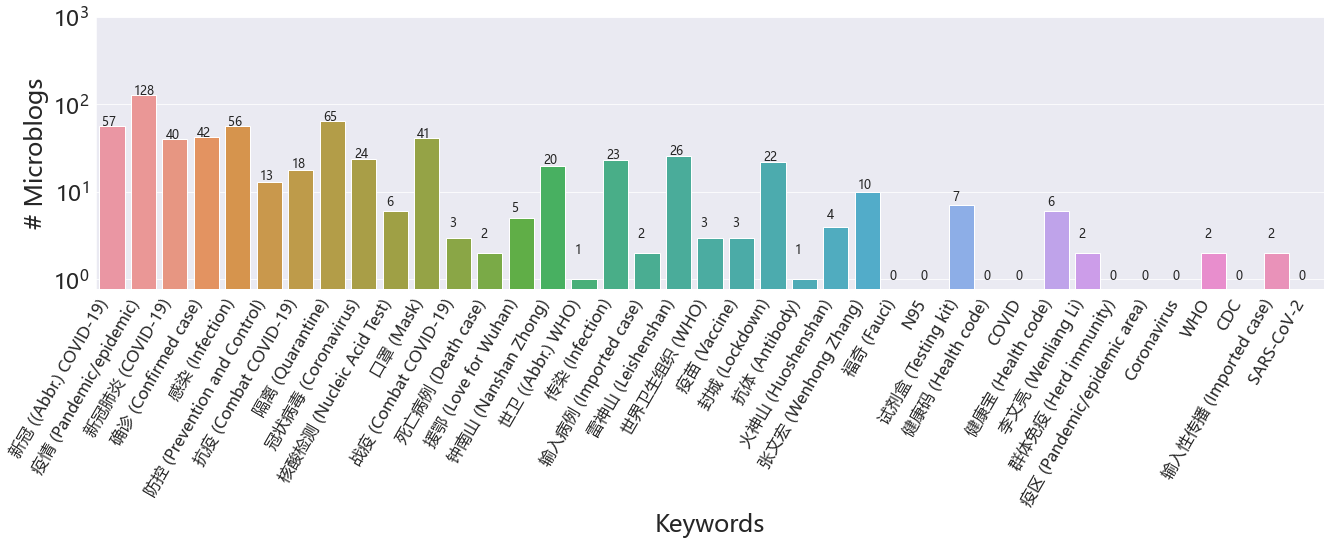

In [14]:
# Data visualizaiton for top 20%
text = []
hist_kws = {'alpha': 1}
for l in dfs['text']:
    text.append(l.lower())

num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-CoV-2','COVID','WHO','CDC']
for t in text:
    for k in key:
        if k in t:
            index = key.index(k)
            num[index] = num[index]+1

plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num,order=['新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','新冠肺炎 (COVID-19)','确诊 (Confirmed case)','感染 (Infection)','防控 (Prevention and Control)','抗疫 (Combat COVID-19)','隔离 (Quarantine)','冠状病毒 (Coronavirus)','核酸检测 (Nucleic Acid Test)','口罩 (Mask)','战疫 (Combat COVID-19)','死亡病例 (Death case)','援鄂 (Love for Wuhan)','钟南山 (Nanshan Zhong)','世卫 ((Abbr.) WHO)','传染 (Infection)','输入病例 (Imported case)','雷神山 (Leishenshan)','世界卫生组织 (WHO)','疫苗 (Vaccine)','封城 (Lockdown)','抗体 (Antibody)','火神山 (Huoshenshan)','张文宏 (Wenhong Zhang)','福奇 (Fauci)','N95','试剂盒 (Testing kit)','健康码 (Health code)','COVID','健康宝 (Health code)','李文亮 (Wenliang Li)','群体免疫 (Herd immunity)','疫区 (Pandemic/epidemic area)','Coronavirus','WHO','CDC','输入性传播 (Imported case)','SARS-CoV-2'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')

#setting y axis to ylim = 10^3 so graph scale matches total keywords graph
ax.set_ylim(top=1000)

matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3

plt.xticks(rotation=60, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
plt.savefig('./Keywords_numOfMicroblogs_3(60).pdf', bbox_inches='tight')
plt.show()

(112, 12)


C:\Users\kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


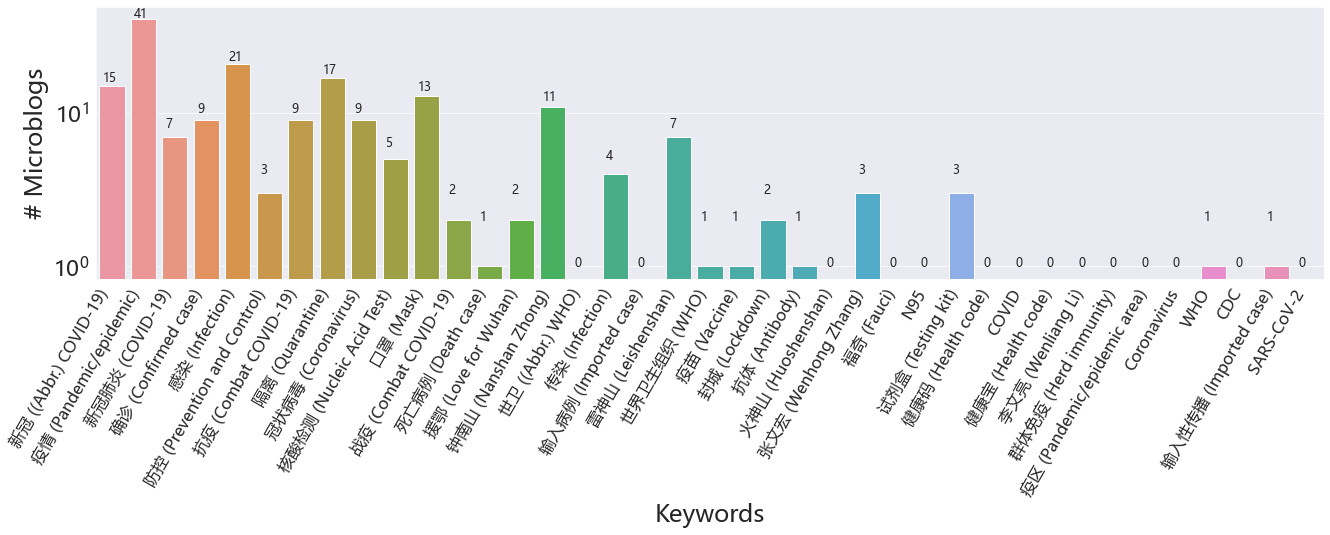

In [52]:
#Statistical summary table for top 20% of "fake" posts for keywords by likes, comments, and reposts

#filter dfs for top 20%
dfs_top_20_per = dfs[(dfs['comment_num']>36) | (dfs['repost_num']>14) | (dfs['like_num']>128)]
print(dfs_top_20_per.shape)

text = []
hist_kws = {'alpha': 1}
for l in dfs_top_20_per['text']:
    text.append(l.lower())

num = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
key = ['冠状病毒','新冠肺炎','新冠','疫情','疫区','传染','感染','确诊','死亡病例','输入病例','输入性传播','世界卫生组织','世卫','钟南山','张文宏','李文亮','福奇','口罩','试剂盒','核酸检测','疫苗','抗体','火神山','雷神山','隔离','封城','防控','群体免疫','健康码','健康宝','战疫','抗疫','援鄂','n95','coronavirus','sars-cov-2','covid','who','cdc']
key_t2 = ['冠状病毒\n(Coronavirus)','新冠肺炎\n(COVID-19)','新冠\n((Abbr.) COVID-19)','疫情\n(Pandemic/epidemic)','疫区\n(Pandemic/epidemic area)','传染\n(Infection)','感染\n(Infection)','确诊\n(Confirmed case)','死亡病例\n(Death case)','输入病例\n(Imported case)','输入性传播\n(Imported case)','世界卫生组织\n(WHO)','世卫\n((Abbr.) WHO)','钟南山\n(Nanshan Zhong)','张文宏\n(Wenhong Zhang)','李文亮\n(Wenliang Li)','福奇\n(Fauci)','口罩\n(Mask)','试剂盒\n(Testing kit)','核酸检测\n(Nucleic Acid Test)','疫苗\n(Vaccine)','抗体\n(Antibody)','火神山\n(Huoshenshan)','雷神山\n(Leishenshan)','隔离\n(Quarantine)','封城\n(Lockdown)','防控\n(Prevention and Control)','群体免疫\n(Herd (community) immunity)','健康码\n(Health code)','健康宝\n(Health code)','战疫\n(Combat COVID-19)','抗疫\n(Combat COVID-19)','援鄂\n(Love for Wuhan)','N95','Coronavirus','SARS-Cov-2','Covid','WHO','CDC']
key_t = ['冠状病毒 (Coronavirus)','新冠肺炎 (COVID-19)','新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','疫区 (Pandemic/epidemic area)','传染 (Infection)','感染 (Infection)','确诊 (Confirmed case)','死亡病例 (Death case)','输入病例 (Imported case)','输入性传播 (Imported case)','世界卫生组织 (WHO)','世卫 ((Abbr.) WHO)','钟南山 (Nanshan Zhong)','张文宏 (Wenhong Zhang)','李文亮 (Wenliang Li)','福奇 (Fauci)','口罩 (Mask)','试剂盒 (Testing kit)','核酸检测 (Nucleic Acid Test)','疫苗 (Vaccine)','抗体 (Antibody)','火神山 (Huoshenshan)','雷神山 (Leishenshan)','隔离 (Quarantine)','封城 (Lockdown)','防控 (Prevention and Control)','群体免疫 (Herd immunity)','健康码 (Health code)','健康宝 (Health code)','战疫 (Combat COVID-19)','抗疫 (Combat COVID-19)','援鄂 (Love for Wuhan)','N95','Coronavirus','SARS-CoV-2','COVID','WHO','CDC']
for t in text:
    for k in key:
        if k in t:
            index = key.index(k)
            num[index] = num[index]+1

plt.figure(figsize=(22,5))
plt.rcParams["font.family"] = 'Microsoft YaHei'
ax = sns.barplot(key_t,num,order=['新冠 ((Abbr.) COVID-19)','疫情 (Pandemic/epidemic)','新冠肺炎 (COVID-19)','确诊 (Confirmed case)','感染 (Infection)','防控 (Prevention and Control)','抗疫 (Combat COVID-19)','隔离 (Quarantine)','冠状病毒 (Coronavirus)','核酸检测 (Nucleic Acid Test)','口罩 (Mask)','战疫 (Combat COVID-19)','死亡病例 (Death case)','援鄂 (Love for Wuhan)','钟南山 (Nanshan Zhong)','世卫 ((Abbr.) WHO)','传染 (Infection)','输入病例 (Imported case)','雷神山 (Leishenshan)','世界卫生组织 (WHO)','疫苗 (Vaccine)','封城 (Lockdown)','抗体 (Antibody)','火神山 (Huoshenshan)','张文宏 (Wenhong Zhang)','福奇 (Fauci)','N95','试剂盒 (Testing kit)','健康码 (Health code)','COVID','健康宝 (Health code)','李文亮 (Wenliang Li)','群体免疫 (Herd immunity)','疫区 (Pandemic/epidemic area)','Coronavirus','WHO','CDC','输入性传播 (Imported case)','SARS-CoV-2'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1),fontsize=12)
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.xticks(rotation=60, horizontalalignment='right')
plt.rc('xtick', labelsize=16)
plt.xlabel('Keywords')
plt.ylabel('# Microblogs')
plt.savefig('./Keywords_numOfMicroblogs_3(60).pdf', bbox_inches='tight')
plt.show()


In [51]:
#print summary statistics
#################################

print('All Fake Microblogs')
print(dfs[['comment_num', 'repost_num', 'like_num']].describe())
print('High Reach Fake Microblogs')
print(dfs_top_20_per[['comment_num', 'repost_num', 'like_num']].describe())

All Fake Microblogs
       comment_num    repost_num       like_num
count   344.000000    344.000000     344.000000
mean    109.793605    162.023256    1293.941860
std     600.986842   1625.257443    9953.240985
min       0.000000      0.000000       0.000000
25%       2.000000      0.000000       2.000000
50%      10.000000      2.000000      16.500000
75%      36.000000     14.000000     127.750000
max    7224.000000  27199.000000  145108.000000
High Reach Fake Microblogs
       comment_num    repost_num       like_num
count   112.000000    112.000000     112.000000
mean    323.401786    494.151786    3945.785714
std    1023.575807   2827.950409   17193.138615
min       2.000000      0.000000       8.000000
25%      37.000000     13.750000     134.750000
50%      71.000000     41.000000     375.500000
75%     163.750000    137.750000    1045.750000
max    7224.000000  27199.000000  145108.000000


In [27]:
'''
number of likes for top 20
'''

print(dfs_top_20_per.shape)

like_num = []
hist_kws = {'alpha': 1}
for l in dfs_top_20_per['like_num']:
    like_num.append(l)

#AVRAGE
nsum=0
for i in range(len(like_num)):
    nsum += like_num[i]
    avrage = nsum / len(like_num)
print("The avrage number of likes is "+ str(avrage))

#MEDIAN
listnum = [like_num[i] for i in range(len(like_num))]
listnum.sort()
lnum = len(like_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of likes is "+ str(median))

'''
number of comments for top 20
'''
for c in dfs_top_20_per['comment_num']:
    comment_num.append(c)
    
#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage number of comments is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of comments is "+ str(median))

'''
number of reposts for top 20
'''

repost_num = []
hist_kws = {'alpha': 1}
for r in dfs_top_20_per['repost_num']:
    repost_num.append(r)

#AVRAGE
nsum=0
for i in range(len(repost_num)):
    nsum += repost_num[i]
    avrage = nsum / len(repost_num)
print("The avrage number of reposts is "+ str(avrage))

#MEDIAN
listnum = [repost_num[i] for i in range(len(repost_num))]
listnum.sort()
lnum = len(repost_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of reposts is "+ str(median))

(0, 11)
The avrage number of likes is 109.7936046511628


IndexError: list index out of range

In [17]:
#filter dfs for top outliers
dfs_top_20_per = dfs[(dfs['comment_num']>20000) | (dfs['repost_num']>1000000) | (dfs['like_num']>1000000)]
print(dfs_top_20_per.shape)

(0, 11)


In [18]:
#filter dfs for bottom 80%
dfs_bottom_80_per = dfs[(dfs['comment_num']<=150) | (dfs['repost_num']<=20) | (dfs['like_num']<=150)]
print(dfs_top_20_per.shape)

'''
number of likes for top 20
'''
like_num = []
hist_kws = {'alpha': 1}
for l in dfs_bottom_80_per['like_num']:
    like_num.append(l)

#AVRAGE
nsum=0
for i in range(len(like_num)):
    nsum += like_num[i]
    avrage = nsum / len(like_num)
print("The avrage number of likes is "+ str(avrage))

#MEDIAN
listnum = [like_num[i] for i in range(len(like_num))]
listnum.sort()
lnum = len(like_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of likes is "+ str(median))

'''
number of comments for top 20
'''
for c in dfs_bottom_80_per['comment_num']:
    comment_num.append(c)
    
#AVRAGE
nsum=0
for i in range(len(comment_num)):
    nsum += comment_num[i]
    avrage = nsum / len(comment_num)
print("The avrage number of comments is "+ str(avrage))

#MEDIAN
listnum = [comment_num[i] for i in range(len(comment_num))]
listnum.sort()
lnum = len(comment_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of comments is "+ str(median))

'''
number of reposts for top 20
'''

repost_num = []
hist_kws = {'alpha': 1}
for r in dfs_bottom_80_per['repost_num']:
    repost_num.append(r)

#AVRAGE
nsum=0
for i in range(len(repost_num)):
    nsum += repost_num[i]
    avrage = nsum / len(repost_num)
print("The avrage number of reposts is "+ str(avrage))

#MEDIAN
listnum = [repost_num[i] for i in range(len(repost_num))]
listnum.sort()
lnum = len(repost_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median number of reposts is "+ str(median))

(0, 11)
The avrage number of likes is 156.328025477707
The median number of likes is 13.5
The avrage number of comments is 106.75436241610738
The median number of comments is 11
The avrage number of reposts is 18.264331210191084
The median number of reposts is 1.0


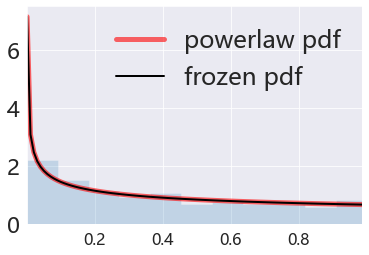

In [19]:
#conduct a power law distribution test on fake microblogs' impact (e.g. likes, comments, and reposts)
import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a = 0.659
mean, var, skew, kurt = powerlaw.stats(a, moments='mvsk')
x = np.linspace(powerlaw.ppf(0.01, a), powerlaw.ppf(0.99, a), 100)
ax.plot(x, powerlaw.pdf(x, a), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
rv = powerlaw(a)

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = powerlaw.ppf([0.001, 0.5, 0.999], a)

np.allclose([0.001, 0.5, 0.999], powerlaw.cdf(vals, a))
r = powerlaw.rvs(a, size=1000)


ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()